In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 자치구별 기존 데이터와 추가된 데이터들별 지도 시각화

In [2]:
import geopandas as gpd
seoul = gpd.GeoDataFrame.from_file('./spatial_analysis-master/spatial_analysis-master/data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
print(seoul.crs)

for i in range(25):
    if seoul.loc[i, "SGG_NM"] == "서울시노원구":
        seoul.loc[i, "SGG_NM"] = "노원구"
    elif seoul.loc[i, "SGG_NM"] == "서울시도봉구":
        seoul.loc[i, "SGG_NM"] = "도봉구"
    elif seoul.loc[i, "SGG_NM"] == "서울시성북구":
        seoul.loc[i, "SGG_NM"] = "성북구"
seoul.head()

{'init': 'epsg:5179'}


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [3]:
total_data = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/통합데이터2.csv", encoding = 'euc-kr')
total_data.head()

,자치구,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,...,재산피해(천원),새벽속도,오전속도,오후속도,저녁속도,새벽교통량,오전교통량,오후교통량,저녁교통량,5년 평균 주정차수
0,강동구,158996,254,61704,17380,14698,1520384,10439,19708,20878,...,533359,31.279554,26.667261,23.867096,24.550370,355180,2136754,2465291,1628408,107841.2
1,송파구,134635,335,63639,20008,16081,2837244,14411,35284,43334,...,958829,31.923905,27.654362,24.658916,25.022997,700548,3727348,4256523,2938998,157846.2
2,강남구,244645,456,64784,15327,14660,4586659,29561,40242,40192,...,1677681,35.468995,30.668044,24.663747,25.740442,1265247,5888586,6928078,4899306,282042.4
3,서초구,300505,242,48749,10581,6791,3279210,16357,21420,29391,...,970247,38.610969,32.700713,26.538161,28.430046,1432953,7090505,7822175,5716302,192251.6
4,관악구,360109,311,67253,20264,20517,1710701,9545,37779,16167,...,654586,35.304238,31.232585,27.170388,27.591352,245047,850977,1011971,768085,95872.0


In [4]:
seoul.rename(columns = {"SGG_NM" : "area"}, inplace = True)
total_data.rename(columns = {"자치구" : "area"}, inplace = True)

In [5]:
seoul = pd.merge(seoul.iloc[:, :6], total_data, on= "area", how = 'left')
seoul.head()

,ADM_SECT_C,area,SGG_OID,COL_ADM_SE,GID,geometry,고령인구수,화재건수,응급환자수,장애인수,...,재산피해(천원),새벽속도,오전속도,오후속도,저녁속도,새벽교통량,오전교통량,오후교통량,저녁교통량,5년 평균 주정차수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996,254,61704,17380,...,533359,31.279554,26.667261,23.867096,24.550370,355180,2136754,2465291,1628408,107841.2
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635,335,63639,20008,...,958829,31.923905,27.654362,24.658916,25.022997,700548,3727348,4256523,2938998,157846.2
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645,456,64784,15327,...,1677681,35.468995,30.668044,24.663747,25.740442,1265247,5888586,6928078,4899306,282042.4
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505,242,48749,10581,...,970247,38.610969,32.700713,26.538161,28.430046,1432953,7090505,7822175,5716302,192251.6
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109,311,67253,20264,...,654586,35.304238,31.232585,27.170388,27.591352,245047,850977,1011971,768085,95872.0


In [6]:
seoul.drop(['주거지역', '상업지역', '공업지역', '녹지지역','새벽속도','오전속도', '저녁속도','새벽교통량', '오전교통량','저녁교통량'], axis = 1, inplace = True)
seoul.head()

,ADM_SECT_C,area,SGG_OID,COL_ADM_SE,GID,geometry,고령인구수,화재건수,응급환자수,장애인수,...,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996,254,61704,17380,...,1520384,10439,19708,20878,28,87213,533359,23.867096,2465291,107841.2
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635,335,63639,20008,...,2837244,14411,35284,43334,28,112660,958829,24.658916,4256523,157846.2
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645,456,64784,15327,...,4586659,29561,40242,40192,37,90862,1677681,24.663747,6928078,282042.4
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505,242,48749,10581,...,3279210,16357,21420,29391,59,71804,970247,26.538161,7822175,192251.6
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109,311,67253,20264,...,1710701,9545,37779,16167,17,125024,654586,27.170388,1011971,95872.0


In [7]:
col_name = seoul.columns[6:]
col_name

Index(['고령인구수', '화재건수', '응급환자수', '장애인수', '기초생활수급자', '전력사용량', '흡연구역수', '20~30년',
       '30년 이상 집 수', '재개발수', '119안전센터 1개소당 담당인구', '재산피해(천원)', '오후속도', '오후교통량',
       '5년 평균 주정차수'],
      dtype='object')

In [8]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

path = "C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=18)

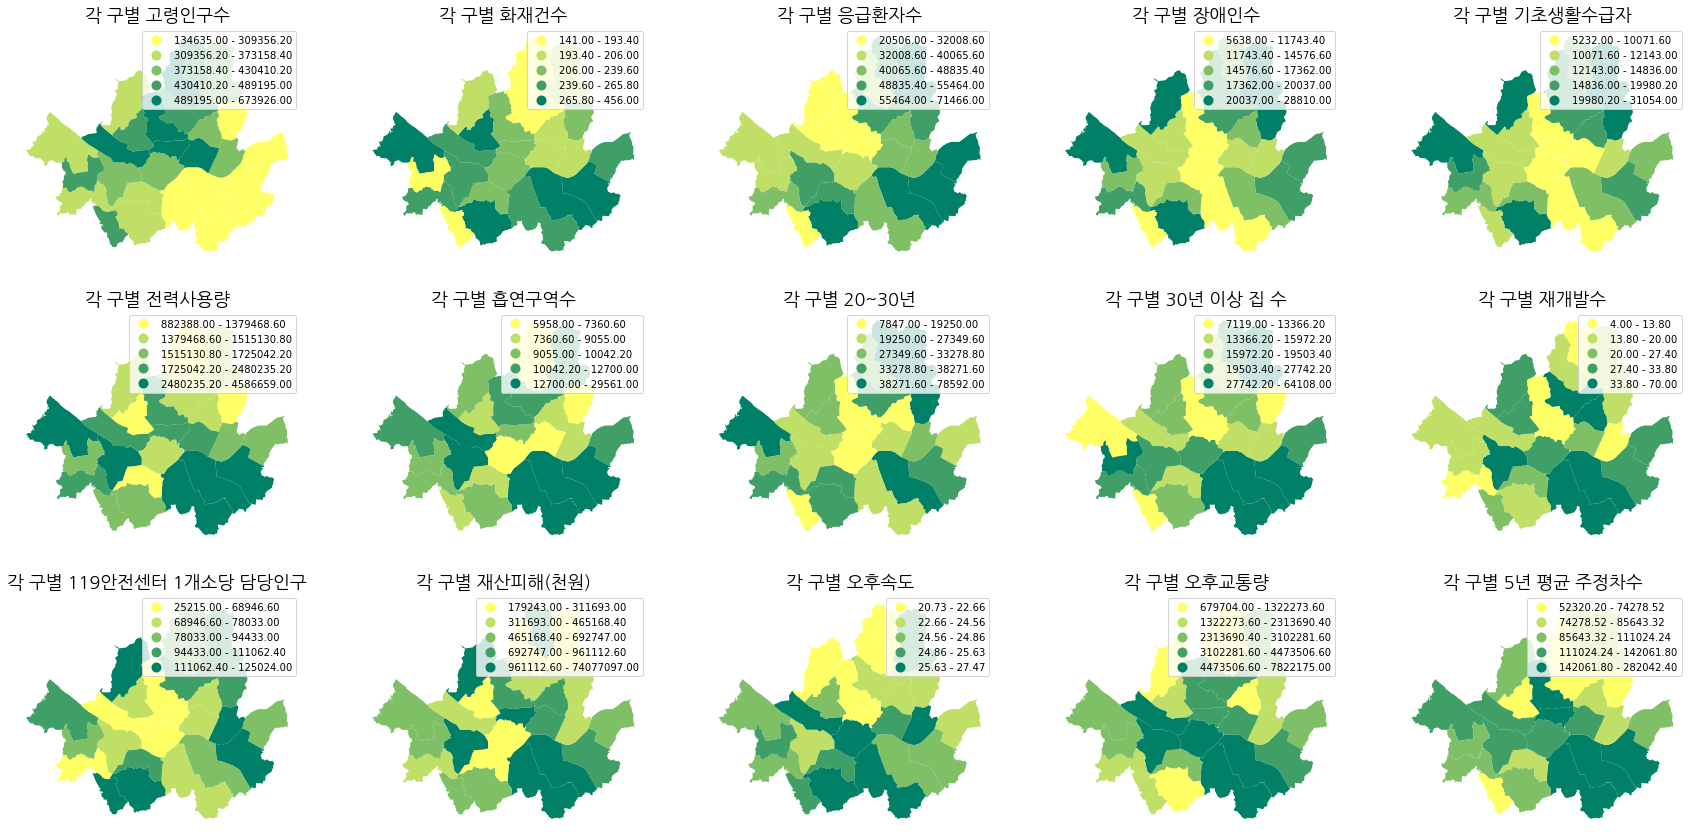

In [9]:
fig = plt.figure(figsize = (30, 20))

for name, i in zip(col_name, range(20)):
    ax = fig.add_subplot(4,5,i+1)
    ax = seoul.plot(ax = ax, column= name , cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
    ax.set_title("각 구별 "+name , fontproperties=fontprop)
    ax.set_axis_off()

plt.show()
# 인구가 많은지/ 문화 관광단지 / 강서구에서 어떤 요인으로 불이 많이 났나 , 어디서 많이 났나, 

## 자치구별 추가된 데이터별 5 level의 값을 가지는 데이터 프레임 생성

In [10]:
seoul_area = seoul.copy()
seoul_area.drop(["ADM_SECT_C","SGG_OID", "COL_ADM_SE","GID","geometry"], axis = 1, inplace = True)
col_name = seoul_area.columns[1:]
benchmark = [[309356.2, 373158.4, 430310.2, 489195],[193.4, 206, 239.6, 265.8],[32008.6, 40065.6, 48835.4, 55464],
            [11743, 14576, 17362, 20037, 28810], [10071.6, 12143, 14836, 19980.2],[1379468.6, 1515130.8, 1725042.2, 2480235.2],
            [7360.6, 9055, 10042.2, 12700],[19250, 27349.6, 33278.8, 38271.6],[13366.2, 15972.2, 19503.4, 27742.2],[13.8, 20, 27.4, 33.8],
            [68946.6, 78033, 94433, 111062.4],[311693, 465168.4, 692747, 961112.6], [22.66, 24.56, 24.86, 25.63],
             [1322273.6, 2313690.4, 3102281.6, 4473506.6],[74278.52, 85643.32, 111024.24, 142061.8, 282042.4]]

In [11]:
col_name

Index(['고령인구수', '화재건수', '응급환자수', '장애인수', '기초생활수급자', '전력사용량', '흡연구역수', '20~30년',
       '30년 이상 집 수', '재개발수', '119안전센터 1개소당 담당인구', '재산피해(천원)', '오후속도', '오후교통량',
       '5년 평균 주정차수'],
      dtype='object')

In [12]:
for col, mark in zip(col_name, benchmark):
    for i in range(25):
        if seoul_area.loc[i, col] <= mark[0]:
            seoul_area.loc[i, col] = 1
        elif seoul_area.loc[i, col] <= mark[1]:
            seoul_area.loc[i, col] = 2
        elif seoul_area.loc[i, col] <= mark[2]:
            seoul_area.loc[i, col] = 3
        elif seoul_area.loc[i, col] <= mark[3]:
            seoul_area.loc[i, col] = 4
        elif seoul_area.loc[i, col] > mark[3]:
            seoul_area.loc[i, col] = 5

In [13]:
seoul_area.head()

,area,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,강동구,1,4,5,4,3,3,4,2,4,4,3,3,2.0,3,3.0
1,송파구,1,5,5,4,4,5,5,4,5,4,5,4,3.0,4,5.0
2,강남구,1,5,5,3,3,5,5,5,5,5,3,5,3.0,5,5.0
3,서초구,1,4,3,1,1,5,5,2,5,5,2,5,5.0,5,5.0
4,관악구,2,5,5,5,5,3,3,4,3,2,5,3,5.0,1,3.0


## 자치구별 추가된 데이터들을 포함하는 correlation 확인

In [14]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

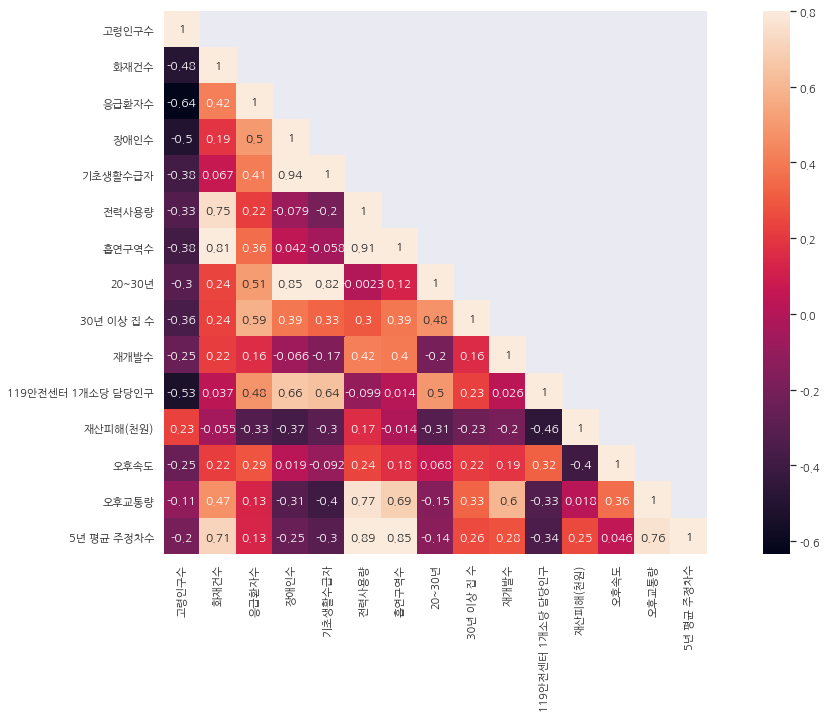

In [15]:
corrMatt = seoul[seoul.columns[6:]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

## 클러스터별 각 데이터의 평균값 확인

In [16]:
new_col = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/클러스터데이터.xlsx",
                   sheet_name = 'Sheet1')
new_col.head()

,자치구,a,b,c,cluster
0,강동구,-0.287448,0.682209,-0.262561,2
1,송파구,0.527453,1.250360,1.836559,0
2,강남구,3.347294,0.040428,5.253430,3
3,서초구,2.808390,-1.552893,2.851665,3
4,관악구,-1.535195,1.005059,-0.656103,2


In [17]:
dict1 = {}
for k in range(4):
    dict1[k] = new_col[new_col["cluster"]==k]["자치구"].values
dict1 

{0: array(['송파구', '강서구', '노원구'], dtype=object),
 1: array(['마포구', '용산구', '중구', '종로구'], dtype=object),
 2: array(['강동구', '관악구', '동작구', '금천구', '구로구', '서대문구', '은평구', '도봉구', '강북구',
        '성북구', '중랑구', '동대문구', '광진구', '성동구', '양천구'], dtype=object),
 3: array(['강남구', '서초구', '영등포구'], dtype=object)}

In [21]:
cluster0 = seoul_area.loc[[1,9,13], :]
cluster0.reset_index(inplace = True)
cluster0.drop("index", axis = 1,inplace = True)
cluster0 = cluster0.append(cluster0.mean(axis = 0), ignore_index = True)
cluster0

,area,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,송파구,1.0,5.0,5.0,4.000000,4.000000,5.0,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.000000,4.000000,5.000000
1,강서구,2.0,5.0,2.0,5.000000,5.000000,5.0,4.000000,5.000000,1.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000
2,노원구,3.0,2.0,5.0,5.000000,5.000000,2.0,4.000000,5.000000,5.000000,2.000000,4.000000,1.000000,4.000000,3.000000,2.000000
3,NaN,2.0,4.0,4.0,4.666667,4.666667,4.0,4.333333,4.666667,3.666667,2.666667,4.333333,2.666667,3.333333,3.333333,3.666667


In [22]:
cluster1 = seoul_area.loc[[10, 21, 22, 23], :]
cluster1.reset_index(inplace = True)
cluster1.drop("index", axis = 1,inplace = True)
cluster1 = cluster1.append(cluster1.mean(axis = 0), ignore_index = True)
cluster1

,area,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,마포구,5.0,4.00,2.0,2.00,2.00,4.0,5.00,2.00,2.0,2.0,1.0,2.0,5.0,5.0,4.0
1,용산구,3.0,3.00,2.0,1.00,1.00,2.0,1.00,1.00,4.0,4.0,1.0,1.0,5.0,5.0,4.0
2,중구,5.0,3.00,1.0,1.00,1.00,4.0,3.00,1.00,1.0,1.0,1.0,5.0,1.0,4.0,5.0
3,종로구,5.0,3.00,1.0,1.00,1.00,4.0,4.00,1.00,1.0,1.0,1.0,4.0,1.0,4.0,5.0
4,NaN,4.5,3.25,1.5,1.25,1.25,3.5,3.25,1.25,2.0,2.0,1.0,3.0,3.0,4.5,4.5


In [23]:
cluster2 = seoul_area.loc[[0, 4, 5, 7,8,11,12,14,15,16,17,18,19,20,24], :]
cluster2.reset_index(inplace = True)
cluster2.drop("index", axis = 1,inplace = True)
cluster2 = cluster2.append(cluster2.mean(axis = 0), ignore_index = True)
cluster2

,area,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,강동구,1.000000,4.000000,5.0,4.000000,3.000000,3.000000,4.000000,2.000000,4.0,4.0,3.0,3.000000,2.000000,3.000000,3.000000
1,관악구,2.000000,5.000000,5.0,5.000000,5.000000,3.000000,3.000000,4.000000,3.0,2.0,5.0,3.000000,5.000000,1.000000,3.000000
2,동작구,2.000000,3.000000,4.0,3.000000,3.000000,1.000000,2.000000,4.000000,2.0,3.0,4.0,1.000000,4.000000,3.000000,2.000000
3,금천구,4.000000,1.000000,1.0,1.000000,2.000000,3.000000,2.000000,1.000000,1.0,3.0,5.0,3.000000,4.000000,2.000000,1.000000
4,구로구,2.000000,4.000000,3.0,4.000000,3.000000,4.000000,3.000000,4.000000,4.0,1.0,1.0,2.000000,3.000000,2.000000,3.000000
5,서대문구,4.000000,5.000000,1.0,2.000000,2.000000,1.000000,2.000000,3.000000,3.0,4.0,2.0,1.000000,3.000000,2.000000,1.000000
6,은평구,2.000000,2.000000,1.0,5.000000,5.000000,2.000000,3.000000,3.000000,3.0,4.0,5.0,5.000000,1.000000,1.000000,3.000000
7,도봉구,4.000000,1.000000,4.0,3.000000,3.000000,1.000000,1.000000,5.000000,4.0,1.0,3.0,4.000000,1.000000,1.000000,2.000000
8,강북구,5.000000,1.000000,2.0,4.000000,4.000000,1.000000,1.000000,3.000000,2.0,2.0,3.0,1.000000,1.000000,1.000000,1.000000
9,성북구,4.000000,1.000000,4.0,4.000000,4.000000,2.000000,4.000000,4.000000,3.0,5.0,4.0,2.000000,2.000000,4.000000,1.000000


In [24]:
cluster3 = seoul_area.loc[[2,3,6], :]
cluster3.reset_index(inplace = True)
cluster3.drop("index", axis = 1,inplace = True)
cluster3 = cluster3.append(cluster3.mean(axis = 0), ignore_index = True)
cluster3

,area,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,재개발수,119안전센터 1개소당 담당인구,재산피해(천원),오후속도,오후교통량,5년 평균 주정차수
0,강남구,1.000000,5.000000,5.0,3.0,3.0,5.0,5.0,5.0,5.000000,5.0,3.000000,5.0,3.000000,5.0,5.000000
1,서초구,1.000000,4.000000,3.0,1.0,1.0,5.0,5.0,2.0,5.000000,5.0,2.000000,5.0,5.000000,5.0,5.000000
2,영등포구,3.000000,4.000000,4.0,2.0,2.0,5.0,5.0,2.0,4.000000,5.0,2.000000,5.0,2.000000,5.0,4.000000
3,NaN,1.666667,4.333333,4.0,2.0,2.0,5.0,5.0,3.0,4.666667,5.0,2.333333,5.0,3.333333,5.0,4.666667


In [25]:
clusters = pd.concat([cluster0.mean(axis = 0),cluster1.mean(axis = 0),cluster2.mean(axis = 0),cluster3.mean(axis = 0)], axis = 1)
clusters

,0,1,2,3
고령인구수,2.000000,4.50,3.066667,1.666667
화재건수,4.000000,3.25,2.466667,4.333333
응급환자수,4.000000,1.50,3.000000,4.000000
장애인수,4.666667,1.25,3.333333,2.000000
기초생활수급자,4.666667,1.25,3.333333,2.000000
전력사용량,4.000000,3.50,2.266667,5.000000
흡연구역수,4.333333,3.25,2.266667,5.000000
20~30년,4.666667,1.25,3.133333,3.000000
30년 이상 집 수,3.666667,2.00,2.800000,4.666667
재개발수,2.666667,2.00,2.800000,5.000000


### --------강서구 채택--------

## 강서구 데이터 수집

## 강서구 인구

In [27]:
population = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 주민등록인구(월별_동별) 통계.txt", delimiter = '\t')
population.head()

,기간,자치구,동,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,외국인,외국인.1,외국인.2
0,기간,자치구,동,세대,합계,남자,여자,소계,남자,여자,소계,남자,여자
1,2021.02,합계,합계,"4,427,814","9,881,998","4,799,707","5,082,291","9,648,606","4,690,282","4,958,324","233,392","109,425","123,967"
2,2021.02,종로구,소계,"75,112","158,332","76,550","81,782","148,884","72,372","76,512","9,448","4,178","5,270"
3,2021.02,종로구,사직동,"4,783","9,820","4,438","5,382","9,542","4,274","5,268",278,164,114
4,2021.02,종로구,삼청동,"1,329","2,886","1,384","1,502","2,609","1,247","1,362",277,137,140


In [28]:
population = population[population["자치구"] == "강서구"]
population.drop(["기간", "자치구", "세대"], axis = 1, inplace = True)
population = population.iloc[:, :2]
population.reset_index(inplace = True)
population.drop("index", axis = 1, inplace = True)
population.drop(0, axis = 0, inplace = True)
population.head()

,동,합계
1,염창동,"42,091"
2,등촌1동,"24,419"
3,등촌2동,"20,977"
4,등촌3동,"31,489"
5,화곡본동,"34,943"


In [29]:
population["동"]

1      염창동
2     등촌1동
3     등촌2동
4     등촌3동
5     화곡본동
6     화곡2동
7     화곡3동
8     화곡4동
9     화곡6동
10    화곡8동
11    가양1동
12    가양2동
13    가양3동
14    발산1동
15     공항동
16    방화1동
17    방화2동
18    방화3동
19    화곡1동
20    우장산동
Name: 동, dtype: object

## 강서구 30년 이상 집

In [30]:
house = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/건물현황/BLCM_STTST_20210429.xlsx",
                     sheet_name = '통계', header = 1)
house = house[house["구분.1"] == "강서구"]
house = house[["구분.1", "구분.2", "합계"]]
house.reset_index(inplace = True)
house.drop("index", axis = 1, inplace = True)
house.rename(columns ={"구분.1" : "자치구", "구분.2" : "동"}, inplace = True)
house.head()

,자치구,동,합계
0,강서구,가양동,120
1,강서구,개화동,350
2,강서구,공항동,955
3,강서구,과해동,8
4,강서구,내발산동,369


## 강서구 65세 이상 인구수

In [31]:
oldpeople = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 고령자현황 (동별) 통계.txt", delimiter = '\t')
oldpeople = oldpeople[oldpeople["자치구"] == "강서구"]
oldpeople = oldpeople.iloc[:, 1:7]
oldpeople.drop(["전체인구", "전체인구.1", "전체인구.2"], axis = 1, inplace = True)
oldpeople.drop(258, axis = 0, inplace = True)
oldpeople.reset_index(inplace = True)
oldpeople.drop("index", axis = 1, inplace = True)
oldpeople

,자치구,동,65세이상 인구
0,강서구,염창동,"4,241"
1,강서구,등촌1동,"2,809"
2,강서구,등촌2동,"3,096"
3,강서구,등촌3동,"6,498"
4,강서구,화곡본동,"4,764"
5,강서구,화곡2동,"2,846"
6,강서구,화곡3동,"3,962"
7,강서구,화곡4동,"3,730"
8,강서구,화곡6동,"3,831"
9,강서구,화곡8동,"4,332"


## 강서구 기초생활수급자수

In [32]:
poor = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 국민기초생활보장 수급자 (동별) 통계.txt", delimiter = '\t')
poor = poor[poor["자치구"] == "강서구"]
poor = poor.iloc[:, 1:4]
poor.drop(273, axis = 0, inplace = True)
poor.reset_index(inplace = True)
poor.drop("index", axis = 1, inplace = True)
poor.head() 

,자치구,동,총 수급자
0,강서구,염창동,145
1,강서구,등촌1동,195
2,강서구,등촌2동,278
3,강서구,등촌3동,"4,074"
4,강서구,화곡본동,"1,107"


## 강서구 장애인 수 

In [33]:
disabled = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 장애인 현황 (장애유형별동별) 통계.txt", delimiter = '\t')
disabled = disabled[disabled["자치구"] == "강서구"]
disabled = disabled.iloc[:, 1:4]
disabled.drop(259, axis = 0, inplace = True)
disabled.reset_index(inplace = True)
disabled.drop("index", axis = 1, inplace = True)
disabled.head() 

,자치구,동,합계
0,강서구,염창동,"1,114"
1,강서구,등촌1동,736
2,강서구,등촌2동,732
3,강서구,등촌3동,"3,861"
4,강서구,화곡본동,"1,420"


## 강서구 화재 발생 수

In [34]:
fire = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/서울시 화재발생 현황 (동별) 통계.txt", delimiter = '\t')
fire = fire[fire["자치구"] == "강서구"]
fire = fire.iloc[:, 1:4]
fire.drop(256, axis = 0, inplace = True)
fire.reset_index(inplace = True)
fire.drop("index", axis = 1, inplace = True)
fire.head() 

,자치구,동,발생
0,강서구,염창동,16
1,강서구,등촌1동,18
2,강서구,등촌2동,8
3,강서구,등촌3동,15
4,강서구,화곡본동,31


In [35]:
# house oldpeople poor disabled fire
total_data1 = pd.merge(poor, oldpeople, on = "동")
total_data1

,자치구_x,동,총 수급자,자치구_y,65세이상 인구
0,강서구,염창동,145,강서구,"4,241"
1,강서구,등촌1동,195,강서구,"2,809"
2,강서구,등촌2동,278,강서구,"3,096"
3,강서구,등촌3동,"4,074",강서구,"6,498"
4,강서구,화곡본동,"1,107",강서구,"4,764"
5,강서구,화곡2동,566,강서구,"2,846"
6,강서구,화곡3동,440,강서구,"3,962"
7,강서구,화곡4동,700,강서구,"3,730"
8,강서구,화곡6동,657,강서구,"3,831"
9,강서구,화곡8동,680,강서구,"4,332"


In [36]:
total_data2 = pd.merge(total_data1, disabled, on = "동")
total_data2

,자치구_x,동,총 수급자,자치구_y,65세이상 인구,자치구,합계
0,강서구,염창동,145,강서구,"4,241",강서구,"1,114"
1,강서구,등촌1동,195,강서구,"2,809",강서구,736
2,강서구,등촌2동,278,강서구,"3,096",강서구,732
3,강서구,등촌3동,"4,074",강서구,"6,498",강서구,"3,861"
4,강서구,화곡본동,"1,107",강서구,"4,764",강서구,"1,420"
5,강서구,화곡2동,566,강서구,"2,846",강서구,795
6,강서구,화곡3동,440,강서구,"3,962",강서구,848
7,강서구,화곡4동,700,강서구,"3,730",강서구,959
8,강서구,화곡6동,657,강서구,"3,831",강서구,960
9,강서구,화곡8동,680,강서구,"4,332",강서구,"1,073"


In [37]:
total_data = pd.merge(total_data2, fire, on = "동")
total_data

,자치구_x,동,총 수급자,자치구_y,65세이상 인구,자치구_x,합계,자치구_y,발생
0,강서구,염창동,145,강서구,"4,241",강서구,"1,114",강서구,16
1,강서구,등촌1동,195,강서구,"2,809",강서구,736,강서구,18
2,강서구,등촌2동,278,강서구,"3,096",강서구,732,강서구,8
3,강서구,등촌3동,"4,074",강서구,"6,498",강서구,"3,861",강서구,15
4,강서구,화곡본동,"1,107",강서구,"4,764",강서구,"1,420",강서구,31
5,강서구,화곡2동,566,강서구,"2,846",강서구,795,강서구,10
6,강서구,화곡3동,440,강서구,"3,962",강서구,848,강서구,5
7,강서구,화곡4동,700,강서구,"3,730",강서구,959,강서구,13
8,강서구,화곡6동,657,강서구,"3,831",강서구,960,강서구,14
9,강서구,화곡8동,680,강서구,"4,332",강서구,"1,073",강서구,17


In [49]:
total_data.drop(["자치구_y","자치구_x"], axis = 1, inplace =True)
total_data.rename(columns = {"총수급자" : "기초생활수급자", "합계": "총 장애인수", "발생": "화재발생"}, inplace = True)

total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      20 non-null     object
 1   총 수급자     20 non-null     object
 2   65세이상 인구  20 non-null     object
 3   총 장애인수    20 non-null     object
 4   화재발생      20 non-null     object
dtypes: object(5)
memory usage: 960.0+ bytes


In [50]:
object_index = total_data.columns[1:]
for objects in object_index:
    total_data[objects] = total_data[objects].map(lambda x : x.replace(",", ""))

    # 숫자로 바꾼다
    total_data[objects] = total_data[objects].map(lambda x : float(x))
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      20 non-null     object 
 1   총 수급자     20 non-null     float64
 2   65세이상 인구  20 non-null     float64
 3   총 장애인수    20 non-null     float64
 4   화재발생      20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


## 수집된 데이터들을 가지고 강서구 행정동별 지도 시각화

In [51]:
import geopandas as gpd
seoul = gpd.GeoDataFrame.from_file("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/강서구/행정동 구역/Z_SOP_BND_ADM_DONG_PG.shp", encoding='cp949')
seoul.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."


In [53]:
list1 = []
for k in total_data["area"].values:
    list1.append(seoul[seoul["ADM_DR_NM"] == k].index.values)
list1


[array([240], dtype=int64),
 array([241], dtype=int64),
 array([242], dtype=int64),
 array([243], dtype=int64),
 array([244], dtype=int64),
 array([245], dtype=int64),
 array([246], dtype=int64),
 array([247], dtype=int64),
 array([248], dtype=int64),
 array([249], dtype=int64),
 array([ 250, 1022], dtype=int64),
 array([ 251, 1023], dtype=int64),
 array([252], dtype=int64),
 array([253], dtype=int64),
 array([254], dtype=int64),
 array([255], dtype=int64),
 array([256], dtype=int64),
 array([257], dtype=int64),
 array([258], dtype=int64),
 array([259], dtype=int64)]

In [54]:
list2 = list(range(240,260))
s_data = seoul.iloc[list2, :]
s_data

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
240,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45..."
241,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45..."
242,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45..."
243,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45..."
244,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44..."
245,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44..."
246,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44..."
247,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44..."
248,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45..."
249,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44..."


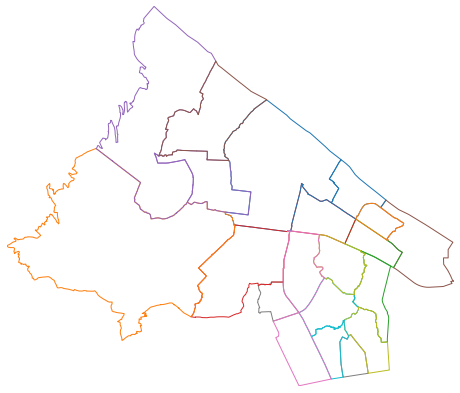

In [55]:
import matplotlib.pyplot as plt
minx, miny, maxx, maxy = s_data.total_bounds

ax = s_data.plot(column="ADM_DR_NM", figsize=(8,8), facecolor = "None", edgecolor = "white")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
plt.show()

In [56]:
s_data["centroid"] = s_data["geometry"].centroid
s_data

<ipython-input-56-687f2618f711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_data["centroid"] = s_data["geometry"].centroid


,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry,centroid
240,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244)
241,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051)
242,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452)
243,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089)
244,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790)
245,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743)
246,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808)
247,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053)
248,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921)
249,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802)


In [57]:
center = s_data.iloc[:, 2:]
center.drop("geometry", axis = 1, inplace = True)
center.rename(columns = {"centroid" :  "geometry"}, inplace = True)
center.head()

,ADM_DR_NM,OBJECTID,geometry
240,염창동,241,POINT (188672.758 450565.244)
241,등촌1동,242,POINT (187595.169 450713.051)
242,등촌2동,243,POINT (187630.417 449601.452)
243,등촌3동,244,POINT (186410.833 451308.089)
244,화곡본동,245,POINT (186577.306 449246.790)


In [76]:
print(center.crs)
center.crs = {"init" : 'epsg:4326'}
print(center.crs)
center.head()

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


,ADM_DR_NM,OBJECTID,geometry
240,염창동,241,POINT (188672.758 450565.244)
241,등촌1동,242,POINT (187595.169 450713.051)
242,등촌2동,243,POINT (187630.417 449601.452)
243,등촌3동,244,POINT (186410.833 451308.089)
244,화곡본동,245,POINT (186577.306 449246.790)


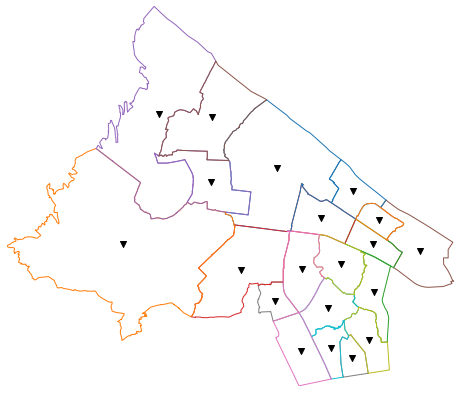

In [60]:
# 강서구 각 행정동별 center point 확인
import matplotlib.pyplot as plt
minx, miny, maxx, maxy = s_data.total_bounds

ax = s_data.plot(column="ADM_DR_NM", figsize=(8,8), facecolor = "None", edgecolor = "white")
center.plot(ax = ax, marker = 'v', color = 'black')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_axis_off()
plt.show()

## 현재까지 수집된 데이터들 시각화

In [62]:
s_data.rename(columns = {"ADM_DR_NM" : "area"}, inplace = True)
total_data.rename(columns = {"동": "area"}, inplace = True)

visual_data = pd.merge(s_data, total_data, on = "area")
visual_data

C:\Users\Leegihong\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,BASE_DATE,ADM_DR_CD,area,OBJECTID,geometry,centroid,총 수급자,65세이상 인구,총 장애인수,화재발생
0,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244),145.0,4241.0,1114.0,16.0
1,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051),195.0,2809.0,736.0,18.0
2,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452),278.0,3096.0,732.0,8.0
3,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089),4074.0,6498.0,3861.0,15.0
4,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790),1107.0,4764.0,1420.0,31.0
5,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743),566.0,2846.0,795.0,10.0
6,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808),440.0,3962.0,848.0,5.0
7,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053),700.0,3730.0,959.0,13.0
8,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921),657.0,3831.0,960.0,14.0
9,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802),680.0,4332.0,1073.0,17.0


In [63]:
total_data
col_name = total_data.columns[1:]
col_name

Index(['총 수급자', '65세이상 인구', '총 장애인수', '화재발생'], dtype='object')

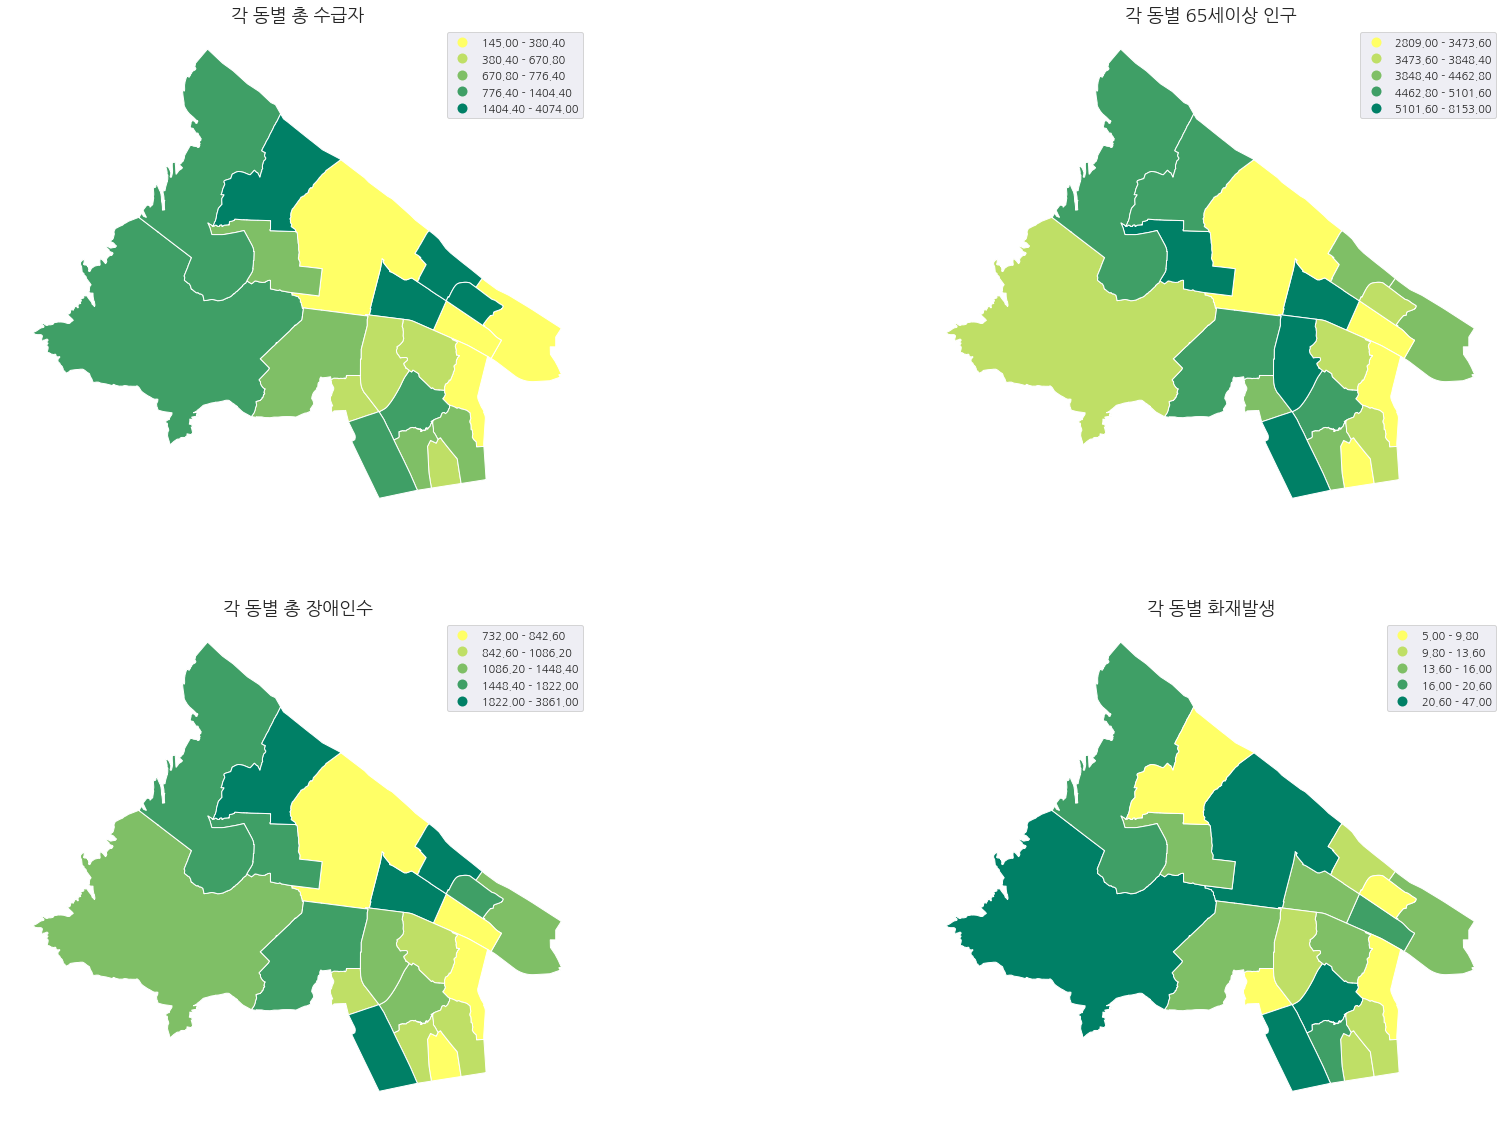

In [64]:
path = "C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure(figsize = (30, 20))

for name, i in zip(col_name, range(4)):
    ax = fig.add_subplot(2,2,i+1)
    ax = visual_data.plot(ax = ax, column= name , cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
    ax.set_title("각 동별 "+name , fontproperties=fontprop)
    ax.set_axis_off()

plt.show()



## 각 데이터들을 5 level에 맞춰서 새로 생성

In [65]:
benchmark = [[380.4, 670.8, 776.4, 1404.4], [3473.6 ,3848.4, 4462.8, 5101.6], [842.6, 1086.2, 1448.4, 1822], [9.8, 13.6, 16,20.6]]
categorical_data = visual_data.copy()
col_name = categorical_data.columns[-4:]

for col, mark in zip(col_name, benchmark):
    for i in range(20):
        if categorical_data.loc[i, col] <= mark[0]:
            categorical_data.loc[i, col] = 1
        elif categorical_data.loc[i, col] <= mark[1]:
            categorical_data.loc[i, col] = 2
        elif categorical_data.loc[i, col] <= mark[2]:
            categorical_data.loc[i, col] = 3
        elif categorical_data.loc[i, col] <= mark[3]:
            categorical_data.loc[i, col] = 4
        elif categorical_data.loc[i, col] > mark[3]:
            categorical_data.loc[i, col] = 5
categorical_data

,BASE_DATE,ADM_DR_CD,area,OBJECTID,geometry,centroid,총 수급자,65세이상 인구,총 장애인수,화재발생
0,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244),1.0,3.0,3.0,3.0
1,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051),1.0,1.0,1.0,4.0
2,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452),1.0,1.0,1.0,1.0
3,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089),5.0,5.0,5.0,3.0
4,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790),4.0,4.0,3.0,5.0
5,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743),2.0,1.0,1.0,2.0
6,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808),2.0,3.0,2.0,1.0
7,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053),3.0,2.0,2.0,2.0
8,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921),2.0,2.0,2.0,3.0
9,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802),3.0,3.0,2.0,4.0


In [66]:
col = ["총 수급자", "65세이상 인구", "총 장애인수", "화재발생"]
bench = [1,2,3,4,5]
cate = {}
for colname in col:
    for benchs in bench:
        area_lst = []
        for i in range(20):
            if categorical_data.loc[i, colname] == benchs:
                area_lst.append(categorical_data.loc[i, "area"])
            cate[colname+str(benchs)] = area_lst
cate

{'총 수급자1': ['염창동', '등촌1동', '등촌2동', '가양1동'],
 '총 수급자2': ['화곡2동', '화곡3동', '화곡6동', '우장산동'],
 '총 수급자3': ['화곡4동', '화곡8동', '발산1동', '방화1동'],
 '총 수급자4': ['화곡본동', '공항동', '방화2동', '화곡1동'],
 '총 수급자5': ['등촌3동', '가양2동', '가양3동', '방화3동'],
 '65세이상 인구1': ['등촌1동', '등촌2동', '화곡2동', '가양1동'],
 '65세이상 인구2': ['화곡4동', '화곡6동', '가양3동', '공항동'],
 '65세이상 인구3': ['염창동', '화곡3동', '화곡8동', '가양2동'],
 '65세이상 인구4': ['화곡본동', '발산1동', '방화2동', '방화3동'],
 '65세이상 인구5': ['등촌3동', '방화1동', '화곡1동', '우장산동'],
 '총 장애인수1': ['등촌1동', '등촌2동', '화곡2동', '가양1동'],
 '총 장애인수2': ['화곡3동', '화곡4동', '화곡6동', '화곡8동'],
 '총 장애인수3': ['염창동', '화곡본동', '공항동', '우장산동'],
 '총 장애인수4': ['가양3동', '발산1동', '방화1동', '방화2동'],
 '총 장애인수5': ['등촌3동', '가양2동', '방화3동', '화곡1동'],
 '화재발생1': ['등촌2동', '화곡3동', '가양3동', '방화3동'],
 '화재발생2': ['화곡2동', '화곡4동', '가양2동', '우장산동'],
 '화재발생3': ['염창동', '등촌3동', '화곡6동', '발산1동', '방화1동'],
 '화재발생4': ['등촌1동', '화곡8동', '방화2동'],
 '화재발생5': ['화곡본동', '가양1동', '공항동', '화곡1동']}

# MCLP를 위한 작업

In [67]:
s_data.reset_index(inplace = True)
s_data.drop("index", axis = 1, inplace = True)
s_data

C:\Users\Leegihong\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,BASE_DATE,ADM_DR_CD,area,OBJECTID,geometry,centroid
0,20200630,1116051,염창동,241,"POLYGON ((188782.771 451176.438, 188880.499 45...",POINT (188672.758 450565.244)
1,20200630,1116052,등촌1동,242,"POLYGON ((188073.965 450173.112, 188073.103 45...",POINT (187595.169 450713.051)
2,20200630,1116053,등촌2동,243,"POLYGON ((187895.291 450272.304, 187976.853 45...",POINT (187630.417 449601.452)
3,20200630,1116054,등촌3동,244,"POLYGON ((186415.070 451699.209, 186433.520 45...",POINT (186410.833 451308.089)
4,20200630,1116055,화곡본동,245,"POLYGON ((186586.318 449927.116, 186615.954 44...",POINT (186577.306 449246.790)
5,20200630,1116057,화곡2동,246,"POLYGON ((187165.016 448531.849, 187178.423 44...",POINT (187129.253 448094.743)
6,20200630,1116058,화곡3동,247,"POLYGON ((185533.909 449840.319, 185535.626 44...",POINT (185356.950 449399.808)
7,20200630,1116059,화곡4동,248,"POLYGON ((187377.606 449223.320, 187407.518 44...",POINT (187502.382 448518.053)
8,20200630,1116061,화곡6동,249,"POLYGON ((187400.774 450253.399, 187403.536 45...",POINT (186854.100 450254.921)
9,20200630,1116063,화곡8동,250,"POLYGON ((186951.872 448820.084, 186953.230 44...",POINT (186633.967 448317.802)


In [68]:
distance_matrix = np.zeros((19,19))
distance_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [69]:
for row in range(19):
    for col in range(19):
        distance_matrix[row, col] = s_data["centroid"][row].distance(s_data["centroid"][col])
print(distance_matrix)

[[   0.         1087.67883504 1419.63803232 2380.78253442 2475.73044982
  2913.03743503 3514.65818321 2358.12849431 1844.9436437  3034.41318674
  3788.82794515 2054.01474407 1172.78958063 4137.20588602 6821.70577975
  5039.21278509 6755.3079354  5684.039478   3572.53412965]
 [1087.67883504    0.         1112.15791423 1325.41426882 1784.92718474
  2659.43898193 2595.03926969 2196.95767005  871.24391892 2580.91527193
  2813.60576282 1296.72624354  564.2206883  3092.62376804 5742.3899247
  3973.95564551 5744.22708886 4719.35576607 2955.65461121]
 [1419.63803232 1112.15791423    0.         2097.61677167 1111.22772541
  1587.87188603 2282.39090327 1090.93740825 1014.73584735 1625.01282369
  3635.10479324 2375.80487741 1662.6799974  3115.44142646 5884.69540347
  4522.20956531 6420.65735495 5501.21514525 2155.44625487]
 [2380.78253442 1325.41426882 2097.61677167    0.         2068.00984291
  3292.67701396 2179.95503069 2995.96041976 1142.65025296 2998.60001191
  1541.65052249  949.43637245 13

In [70]:
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,1087.678835,1419.638032,2380.782534,2475.730450,2913.037435,3514.658183,2358.128494,1844.943644,3034.413187,3788.827945,2054.014744,1172.789581,4137.205886,6821.705780,5039.212785,6755.307935,5684.039478,3572.534130
1,1087.678835,0.000000,1112.157914,1325.414269,1784.927185,2659.438982,2595.039270,2196.957670,871.243919,2580.915272,2813.605763,1296.726244,564.220688,3092.623768,5742.389925,3973.955646,5744.227089,4719.355766,2955.654611
2,1419.638032,1112.157914,0.000000,2097.616772,1111.227725,1587.871886,2282.390903,1090.937408,1014.735847,1625.012824,3635.104793,2375.804877,1662.679997,3115.441426,5884.695403,4522.209565,6420.657355,5501.215145,2155.446255
3,2380.782534,1325.414269,2097.616772,0.000000,2068.009843,3292.677014,2179.955031,2995.960420,1142.650253,2998.600012,1541.650522,949.436372,1318.801326,2197.845045,4595.979618,2658.431351,4424.563945,3431.089702,3079.809910
4,2475.730450,1784.927185,1111.227725,2068.009843,0.000000,1277.442636,1229.911041,1177.635029,1045.438581,930.714327,3432.252510,2734.817154,2320.314671,2200.626091,4948.543470,3948.546753,5912.968741,5145.472369,1171.068153
5,2913.037435,2659.438982,1587.871886,3292.677014,1277.442636,0.000000,2200.965816,564.285076,2177.631307,543.197540,4705.417437,3829.837535,3222.735741,3274.745329,5892.968739,5181.591883,7152.088707,6417.470821,1201.629286
6,3514.658183,2595.039270,2282.390903,2179.955031,1229.911041,2200.965816,0.000000,2319.562095,1724.144833,1673.770313,3070.342225,3086.816361,3015.049267,1077.574042,3744.204575,3105.885789,5062.090477,4481.323184,1276.098012
7,2358.128494,2196.957670,1090.937408,2995.960420,1177.635029,564.285076,2319.562095,0.000000,1853.908689,891.204421,4477.459972,3426.504872,2752.493173,3352.941654,6063.125160,5115.582517,7073.608964,6263.537433,1583.134169
8,1844.943644,871.243919,1014.735847,1142.650253,1045.438581,2177.631307,1724.144833,1853.908689,0.000000,1949.586005,2651.010059,1692.773441,1333.317534,2298.689074,5022.789572,3514.701100,5405.949840,4495.862256,2190.391752
9,3034.413187,2580.915272,1625.012824,2998.600012,930.714327,543.197540,1673.770313,891.204421,1949.586005,0.000000,4332.287823,3641.120581,3140.439002,2750.960120,5350.211014,4703.959660,6674.461489,5983.087872,696.328418


In [ ]:
distance_matrix[1,2]
w = house["합계"].values
X_std = (w - w.min()) / (w.max() - w.min())
X_scaled = X_std * (w.max() - w.min()) + w.min()
X_scaled

In [ ]:
w.min()

## mclp

In [72]:
import numpy as np
import pandas as pd
from pulp import *


I = list(range(19)) # demand node
J = list(range(19)) # potential lacations 
S = 1500
d = distance_matrix

a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
P = 5

# Compute the sets Ni
# NB: this will be a list in which each item is a list of nodes
# within the threshold distance of the i'th node
N = [[j for j in J if d[i][j] < S] for i in I]

# Formulate optimisation

prob = LpProblem("MCLP", LpMaximize)
x = LpVariable.dicts("x", J, 0, upBound= 1, cat='Binary' )
y = LpVariable.dicts("y", I, 0, upBound= 1, cat='Binary' )

In [73]:
# Objective
prob += lpSum([a[i]*y[i] for i in I])

# Constraints
for i in I:
    prob += lpSum([x[j] for j in N[i]]) >= y[i]

prob += lpSum([x[j] for j in J]) == P

# Solve problem
prob.solve()

x_soln = np.array([x[j].varValue for j in J])

# And print some output
print (("Status:"), LpStatus[prob.status])
print ("Population Served is = ", value(prob.objective))
print ("x = ", x_soln)

Status: Optimal
Population Served is =  18.0
x =  [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]


In [74]:
varsdict = {}
for v in prob.variables():
    varsdict[v.name] = v.varValue
varsdict

{'x_0': 0.0,
 'x_1': 1.0,
 'x_10': 0.0,
 'x_11': 0.0,
 'x_12': 0.0,
 'x_13': 1.0,
 'x_14': 1.0,
 'x_15': 0.0,
 'x_16': 0.0,
 'x_17': 1.0,
 'x_18': 0.0,
 'x_2': 0.0,
 'x_3': 0.0,
 'x_4': 1.0,
 'x_5': 0.0,
 'x_6': 0.0,
 'x_7': 0.0,
 'x_8': 0.0,
 'x_9': 0.0,
 'y_0': 1.0,
 'y_1': 1.0,
 'y_10': 0.0,
 'y_11': 1.0,
 'y_12': 1.0,
 'y_13': 1.0,
 'y_14': 1.0,
 'y_15': 1.0,
 'y_16': 1.0,
 'y_17': 1.0,
 'y_18': 1.0,
 'y_2': 1.0,
 'y_3': 1.0,
 'y_4': 1.0,
 'y_5': 1.0,
 'y_6': 1.0,
 'y_7': 1.0,
 'y_8': 1.0,
 'y_9': 1.0}